Context

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.



Approach
Loading Data

1.Input and Output Data

2.Applying Regular Expression

3.Each word to lower case

4.Splitting words to Tokenize

5.Stemming with PorterStemmer handling Stop Words

6.Preparing Messages with Remaining Tokens

7.Preparing WordVector Corpus

Applying Classification

Models :

1. Multinomial naive bayes

2. Random Forest



In [63]:

import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [64]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [65]:
from tables import Column
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv',encoding='latin-1')
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [66]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [67]:
df = df.replace(['ham','spam'],[0, 1]) 

In [68]:
df['Count']=0
for i in np.arange(0,len(df.v2)):
    df.loc[i,'Count'] = len(df.loc[i,'v2'])

In [69]:
# Total ham(0) and spam(1) messages
df['v1'].value_counts()


0    4825
1     747
Name: v1, dtype: int64

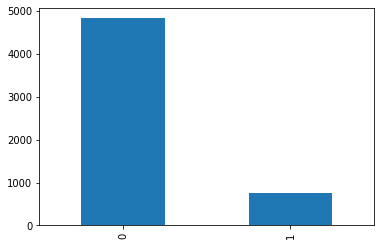

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

df['v1'].value_counts().plot(kind = 'bar')
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
 2   Count   5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


In [72]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['v2'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [74]:
    
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(df['v1'])
y=y.iloc[:,1].values

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [76]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)

In [77]:
# Evaluating
cm = confusion_matrix(y_test, y_pred)

In [78]:
cm

array([[943,   6],
       [  9, 157]])

In [79]:

print ("Accuracy : %0.5f \n\n" % accuracy_score(y_test, spam_detect_model.predict(X_test)))
print (classification_report(y_test, spam_detect_model.predict(X_test)))

Accuracy : 0.98655 


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.96      0.95      0.95       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
dt = RandomForestClassifier(random_state=50)
dt.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [82]:

# Predicting
y_pred_dt = dt.predict(X_test)

In [83]:
cm = confusion_matrix(y_test, y_pred)

In [84]:

print ("Accuracy : %0.5f \n\n" % accuracy_score(y_test, spam_detect_model.predict(X_test)))
print (classification_report(y_test, spam_detect_model.predict(X_test)))

Accuracy : 0.98655 


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.96      0.95      0.95       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

